### Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.

Here we have prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

#### Size of training set: 10683 records
#### Size of test set: 2671 records


In [672]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For train dataset

In [674]:
#reading a training dataset
df = pd.read_csv('train_data.csv', encoding= 'unicode_escape')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


with the above observation of dataset,our target variable is Price and we are going to predict Attrition considering the features like Source,Route ,etc., which are given in the dataset.

In [675]:
#to check how many rows and columns in dataframe
df.shape

(10683, 11)

In [676]:
df.duplicated().sum()

220

So,there are duplicate records in training data

In [677]:
df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


duplicate records has been removed for train dataset.

In [678]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


with above details,we can observe all the datatypes of each column along with memory consumption of dataset

In [679]:
#to check whether any null values present in dataframe
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [680]:
df = df.dropna()

In [681]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

null values has been handled.

In [682]:
#convertng Date_of_Journey into day and month columns

df['Month'] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df['Day']   = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.day

In [683]:
#convertng Dep_Time into d_hour and d_min

df['d_hour']  = pd.to_datetime(df["Dep_Time"]).dt.hour
df['d_min'] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [684]:
#convertng Arrival_Time into a_hour and a_min

df['a_hour']  = pd.to_datetime(df.Arrival_Time).dt.hour
df['a_min'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [685]:
#to get statistics information
df.describe()

,Price,Month,Day,d_hour,d_min,a_hour,a_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,4.708575,13.509081,12.491013,24.409287,13.349186,24.690601
std,4611.548810,1.164408,8.479363,5.748820,18.767801,6.859317,16.506808
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,5.000000,12.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000


with above information,we can see there no missing values in any column and we can also observe the fact that many columns contains a minimum value of even 0 value,which means the value can even go with zero amount as well.

In [686]:
#now,we can drop columns like "Date_of_Journey","Dep_Time" and "Arrival_Time"

df.drop(["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1,inplace = True)

In [687]:
df['Route'].value_counts()

DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64

In [688]:
#Snce Route and Total_stops are relevant to each other.
#So, i will remove Route from dataframe by keeping only Total_steps
df = df.drop(['Route'],axis=1)

In [689]:
df #looking back at updated dataframe

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,d_hour,d_min,a_hour,a_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


In [690]:
# Duration is the differnce between Departure Time and Arrival time

# converting duration into du_hour and du_min columns

duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

du_hour = []
du_min = []
for i in range(len(duration)):
    du_hour.append(int(duration[i].split(sep = "h")[0]))    
    du_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

df["du_hour"] = du_hour
df["du_min"] = du_min

In [691]:
#dropping the "Duration" column

df.drop(["Duration"], axis = 1, inplace = True)

In [692]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Day,d_hour,d_min,a_hour,a_min,du_hour,du_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,3,1,11,30,14,10,2,40


Now,dataframe looks much better to proceed for EDA.

## EDA

In [693]:
import warnings
warnings.filterwarnings('ignore') #to remove warning messages

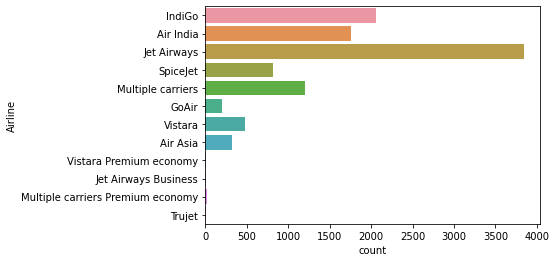

In [694]:
ax = sns.countplot(y="Airline", data=df) ## Let's check Airline types

So,there is "jet Airways" which is available more often then compared to other airways and there are no records on last 4 airways as shown in above graph.


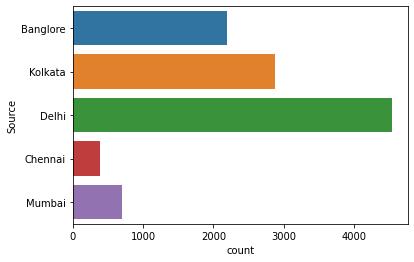

In [695]:
ax = sns.countplot(y="Source", data=df)

So,most airways are departuring from Delhi.

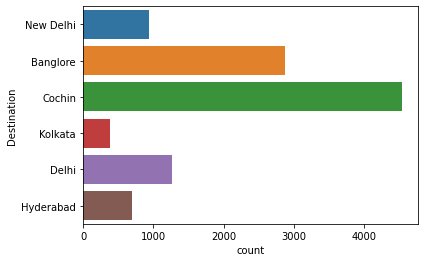

In [696]:
ax = sns.countplot(y="Destination", data=df)

Most airways have a destination as Cochin.

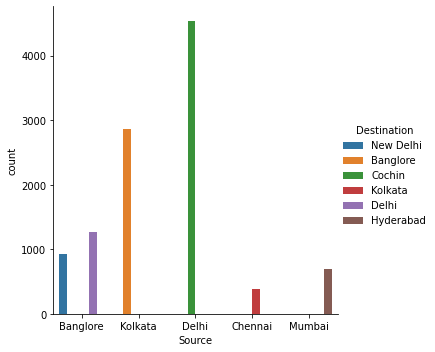

In [697]:
sns.factorplot('Source', data=df, kind="count", hue='Destination')

So,the airways which are departing from Bangalore usually destined to reach either Delhi or New delhi and others all have unique destination and source location.

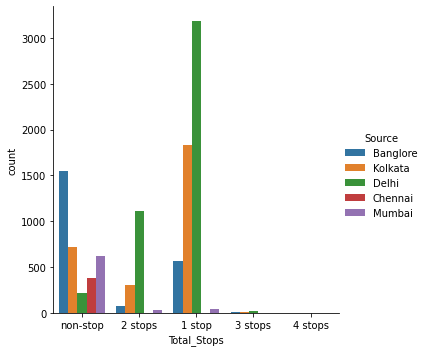

In [698]:
sns.factorplot('Total_Stops', data=df, kind="count", hue='Source')

So,those airways which are departuring from Delhi or Kolkata usually have 1 stop.

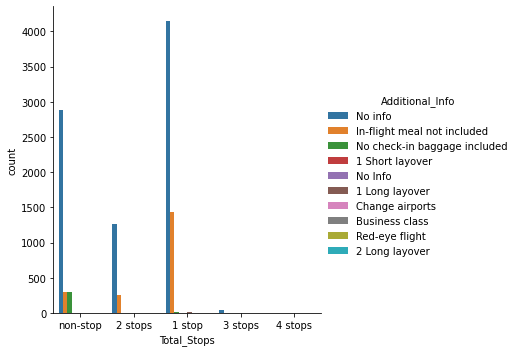

In [699]:
sns.factorplot('Total_Stops', data=df, kind="count", hue='Additional_Info')

So,mostly those airways which are having 'non_stop' usually doesn't contan any additional_info.

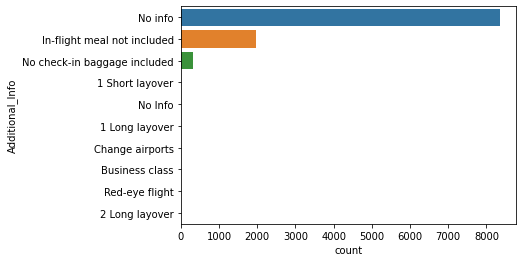

In [700]:
ax = sns.countplot(y="Additional_Info", data=df)

So,there are lot of records which contains no additional info.

In [701]:
#Since this column mostly contains No info.
#So,we can remove this column

df = df.drop(["Additional_Info"],axis=1)

In [702]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Month',
       'Day', 'd_hour', 'd_min', 'a_hour', 'a_min', 'du_hour', 'du_min'],
      dtype='object')

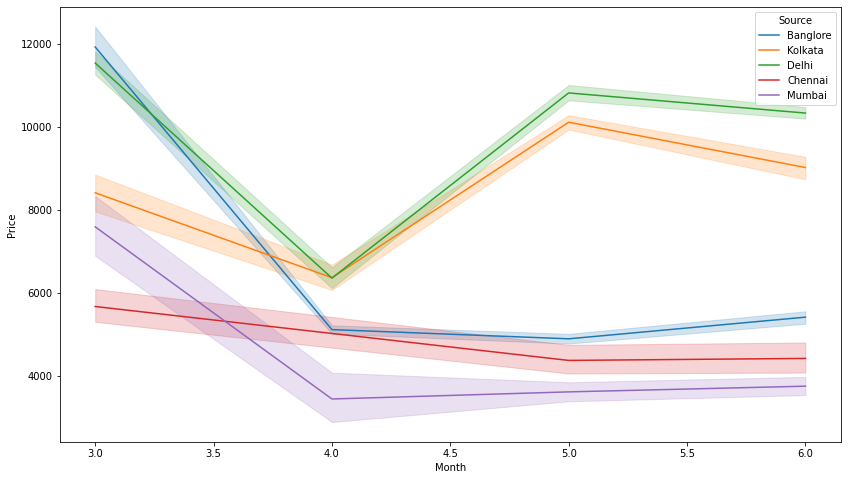

In [703]:
plt.figure(figsize=(14,8))
sns.lineplot(x="Month", y="Price", hue='Source', data=df)
plt.show()

So,the airways which were leavng from various places usually had a peak ticket price in the month of march except for few airways which are departurng from Kolkata for which there was a peak ticket price n the month of May(5).

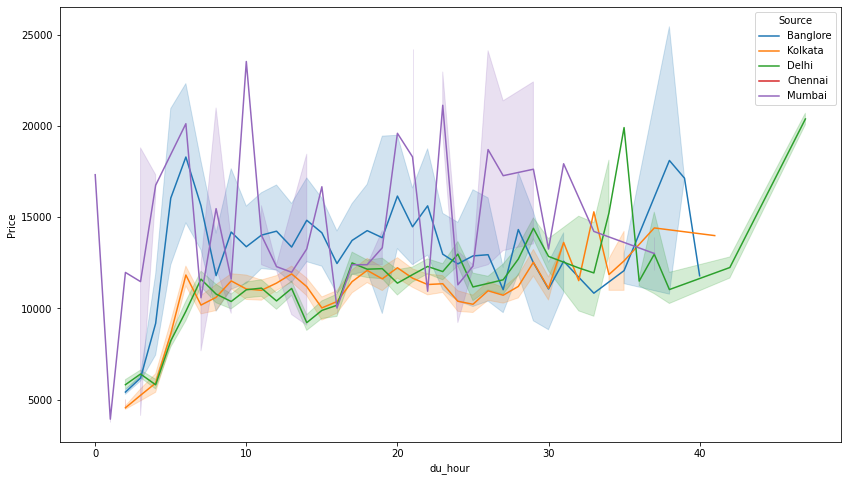

In [704]:
plt.figure(figsize=(14,8))
sns.lineplot(x="du_hour", y="Price", hue='Source', data=df)
plt.show()

So,mostly the airways which are departuring from Mumbai usually has a high ticket price compared to other source locations no matter what the duration of travelling.

##  Handling Catagorical values

In [715]:
#Since there are objective type columns,so we can use Label encoder method.

# from sklearn.preprocessing import LabelEncoder

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4,
            'Jet Airways':5,'IndiGo':6,'Air India':7,'Multiple carriers':8,'SpiceJet':9,'Vistara':10,'Air Asia':11,'GoAir':12,'Multiple carriers Premium economy':13,
            'Jet Airways Business':14,'Vistara Premium economy':15,'Trujet':16}, inplace = True)

In [725]:
#for source column

l = []
a = df['Source']
for i in a:
  if i == 'Delhi':
    l.append(0)
  elif i == 'Kolkata':
    l.append(1)
  elif i == 'Banglore':
    l.append(2)
  elif i == 'Mumbai':
    l.append(3)
  elif i == 'Chennai':
    l.append(4)

#for Destination column

l_d = []
b = df['Destination']
for i in b:
  if i == 'Cochin':
    l_d.append(0)
  elif i == 'Banglore':
    l_d.append(1)
  elif i == 'Delhi':
    l_d.append(2)
  elif i == 'New Delhi':
    l_d.append(3)
  elif i == 'Hyderabad':
    l_d.append(4)
  elif i == 'Kolkata':
    l_d.append(5)

df['en_source'] = l   #adding encoded source column to a dataframe
df['en_destination'] = l_d   #adding encoded destination column to a dataframe


In [726]:
#removing previous source and destination columns

df = df.drop(['Source','Destination'],axis=1)

In [730]:
df

,Airline,Total_Stops,Price,Month,Day,d_hour,d_min,a_hour,a_min,du_hour,du_min,en_source,en_destination
0,6,0,3897,3,24,22,20,1,10,2,50,2,3
1,7,2,7662,5,1,5,50,13,15,7,25,1,1
2,5,2,13882,6,9,9,25,4,25,19,0,0,0
3,6,1,6218,5,12,18,5,23,30,5,25,1,1
4,6,1,13302,3,1,16,50,21,35,4,45,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,11,0,4107,4,9,19,55,22,25,2,30,1,1
10679,7,0,4145,4,27,20,45,23,20,2,35,1,1
10680,5,0,7229,4,27,8,20,11,20,3,0,2,2
10681,10,0,12648,3,1,11,30,14,10,2,40,2,3


In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Airline         10682 non-null  int64
 1   Total_Stops     10682 non-null  int64
 2   Price           10682 non-null  int64
 3   Month           10682 non-null  int64
 4   Day             10682 non-null  int64
 5   d_hour          10682 non-null  int64
 6   d_min           10682 non-null  int64
 7   a_hour          10682 non-null  int64
 8   a_min           10682 non-null  int64
 9   du_hour         10682 non-null  int64
 10  du_min          10682 non-null  int64
 11  en_source       10682 non-null  int64
 12  en_destination  10682 non-null  int64
dtypes: int64(13)
memory usage: 1.4 MB


So,now there are no objective type columns present in dataframe.

## Correlation

In [732]:
df.corr()

,Airline,Total_Stops,Price,Month,Day,d_hour,d_min,a_hour,a_min,du_hour,du_min,en_source,en_destination
Airline,1.000000,-0.202022,-0.280875,-0.031411,0.017563,-0.068034,0.057397,0.032599,0.085010,-0.245756,0.078928,0.061012,0.046052
Total_Stops,-0.202022,1.000000,0.603897,0.054383,-0.009451,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,-0.590943,-0.538419
Price,-0.280875,0.603897,1.000000,-0.103643,-0.153774,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,-0.358978,-0.304826
Month,-0.031411,0.054383,-0.103643,1.000000,-0.038359,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,-0.167047,-0.226290
Day,0.017563,-0.009451,-0.153774,-0.038359,1.000000,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,-0.066410,-0.068173
d_hour,-0.068034,-0.061476,0.006799,0.039127,0.002170,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,0.035173,0.017964
d_min,0.057397,-0.002618,-0.024458,-0.059267,-0.008170,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,0.117637,0.128105
a_hour,0.032599,0.038140,0.024244,-0.003927,-0.003245,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,-0.028430,-0.029796
a_min,0.085010,-0.106940,-0.086155,-0.100626,-0.017510,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,0.148661,0.129915
du_hour,-0.245756,0.739916,0.508778,0.016141,-0.022059,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,-0.434206,-0.401697


In [733]:
#with target variable
df.corr()['Price'].sort_values()

en_source        -0.358978
en_destination   -0.304826
Airline          -0.280875
Day              -0.153774
du_min           -0.124855
Month            -0.103643
a_min            -0.086155
d_min            -0.024458
d_hour            0.006799
a_hour            0.024244
du_hour           0.508778
Total_Stops       0.603897
Price             1.000000
Name: Price, dtype: float64

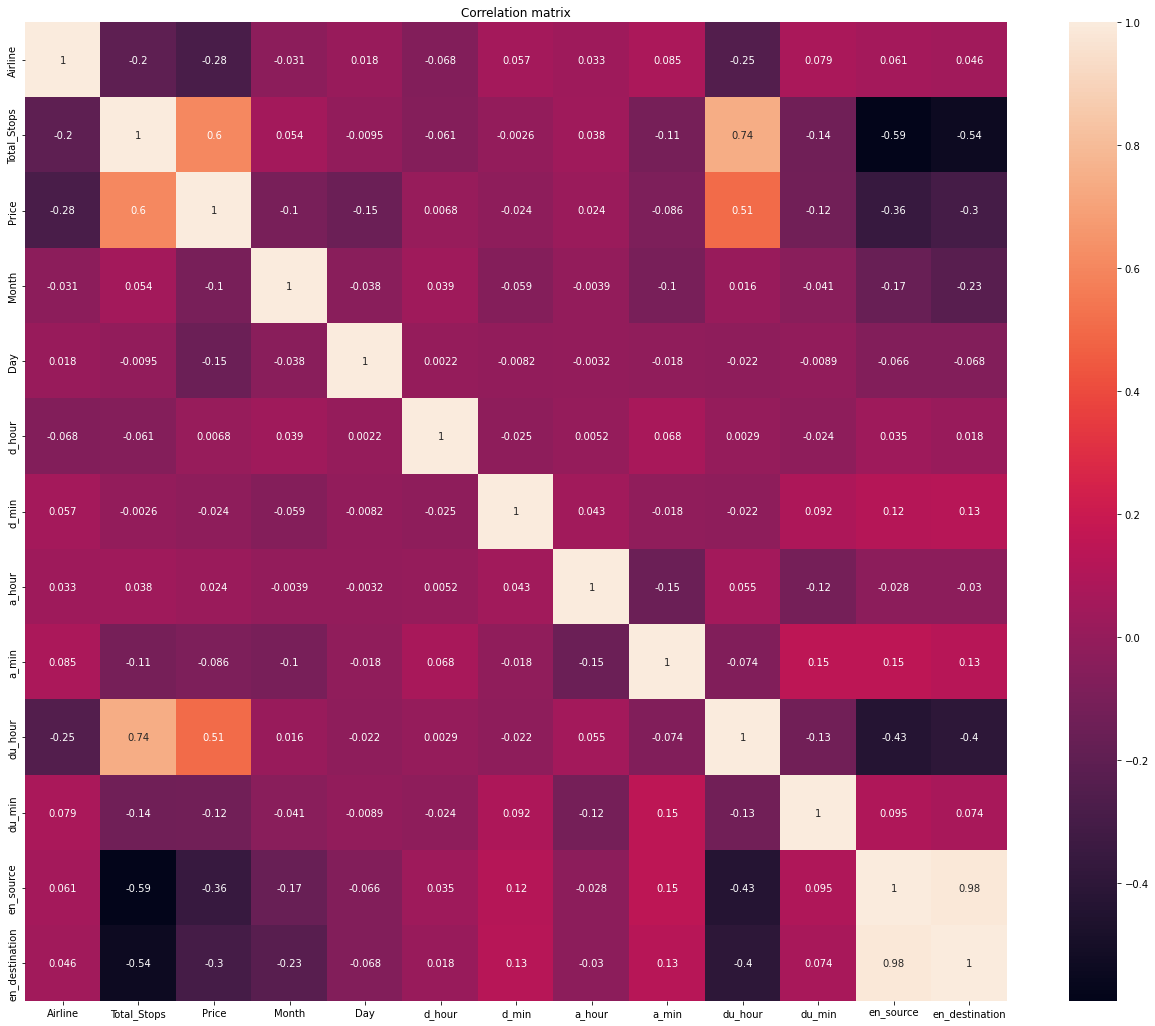

In [734]:
#plotting the correlation matrix using heatmap

corr_matrix = df.corr()
plt.figure(figsize=[22,18])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

### with this,there are both positive and negativs correlations with target variable,

#### 1)"en_source " has highest negative correlation(36%) w.r.t target variable.
#### 2)"d_min" has least negative correlation(2%) w.r.t target variable.
#### 3)"Total_Stops" has highest positive correlation(60%) w.r.t target variable.
#### 4)"d_hour" has least positive correlation(<1%).

## Checking with outliers

In [735]:
df1 = df.iloc[:,:8]
df2 = df.iloc[:,8:]

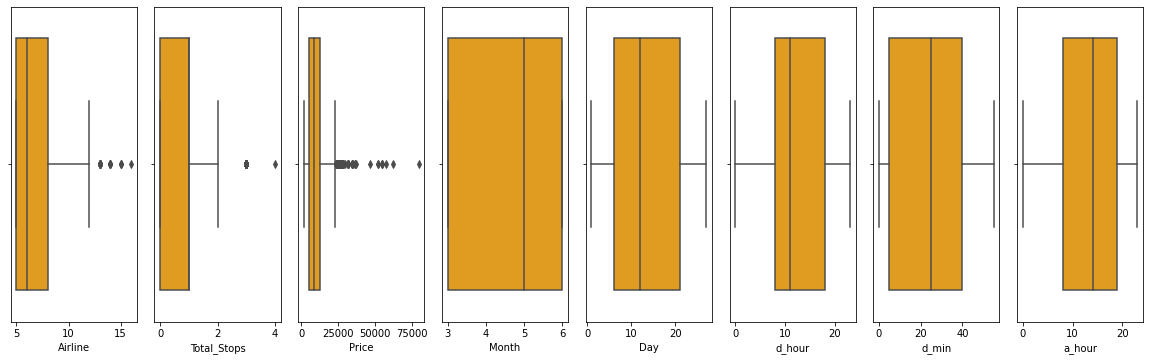

In [736]:
column_list = df1.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

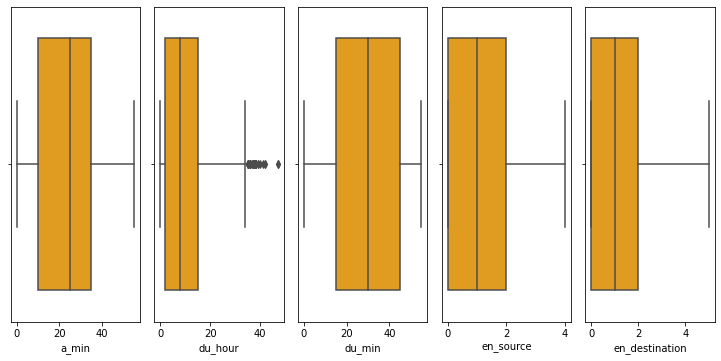

In [737]:
column_list = df2.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

So,with above observations we have outliers in du_hour,Airline,total stops and price.

## checking with Skewness

In [738]:
df.skew().sort_values()

Month            -0.387409
a_hour           -0.370146
du_min           -0.090680
a_min             0.110945
d_hour            0.112924
Day               0.118174
d_min             0.167234
Total_Stops       0.317109
du_hour           0.851197
en_source         0.898491
Airline           1.064992
en_destination    1.119306
Price             1.812405
dtype: float64

## Removing the outliers

In [739]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(10682, 13)

In [740]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(10682, 13)
(10471, 13)
211


## calcuating the percentage of data loss

In [741]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:1.98%


there is a 1.98% data loss which is good to proceed for further.

## Dividing the data into features and vectors

In [823]:
y = df[["Price"]]
x = df.drop(["Price"],axis=1)

## Checking with multicollinearity

In [824]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [825]:
calc_vif_value(x)

,variables,VIF
0,Airline,11.431986
1,Total_Stops,7.184548
2,Month,13.245158
3,Day,3.348181
4,d_hour,5.391718
5,d_min,2.786512
6,a_hour,4.662906
7,a_min,3.424548
8,du_hour,5.506542
9,du_min,3.849440


## Fixing the Multicollinearity

In [826]:
x["en_source_en_destination"] = df.apply(lambda x_1: x_1['en_source'] - x_1['en_destination'],axis=1)

In [827]:
x = x.drop(["en_source","en_destination"],axis=1)

In [828]:
calc_vif_value(x)

,variables,VIF
0,Airline,11.422387
1,Total_Stops,5.666292
2,Month,12.057662
3,Day,3.347249
4,d_hour,5.356640
5,d_min,2.770696
6,a_hour,4.639225
7,a_min,3.323131
8,du_hour,5.484193
9,du_min,3.813024


Now the values are in desired range.

## Transforming data to eliminate skewness

In [829]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[-0.16067545, -1.29781964, -1.40174783,  1.16429632,  1.54588835,
         0.02318631, -1.79073268, -0.77657798, -1.17564313,  1.20041293,
        -2.07712009],
       [ 0.4890846 ,  1.57461744,  0.16141773, -1.71642404, -1.35623658,
         1.1793539 , -0.0560057 , -0.43301039, -0.05525394, -0.09997587,
         0.48143581],
       [-1.13897399,  1.57461744,  1.17509575, -0.405463  , -0.54819821,
         0.25593509, -1.36258424,  0.15684039,  1.07471547, -1.87792766,
         0.48143581],
       [-0.16067545,  0.3587823 ,  0.16141773, -0.04162094,  0.95632914,
        -0.933677  ,  1.41390956,  0.42085521, -0.39311736, -0.09997587,
         0.48143581],
       [-0.16067545,  0.3587823 , -1.40174783, -1.71642404,  0.64665214,
         1.1793539 ,  1.11889916,  0.67032085, -0.6032132 ,  0.95557131,
        -2.07712009]])

In [830]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[:5]

array([[-0.16067545, -1.29781964, -1.40174783,  1.16429632,  1.54588835,
         0.02318631, -1.79073268, -0.77657798, -1.17564313,  1.20041293,
        -2.07712009],
       [ 0.4890846 ,  1.57461744,  0.16141773, -1.71642404, -1.35623658,
         1.1793539 , -0.0560057 , -0.43301039, -0.05525394, -0.09997587,
         0.48143581],
       [-1.13897399,  1.57461744,  1.17509575, -0.405463  , -0.54819821,
         0.25593509, -1.36258424,  0.15684039,  1.07471547, -1.87792766,
         0.48143581],
       [-0.16067545,  0.3587823 ,  0.16141773, -0.04162094,  0.95632914,
        -0.933677  ,  1.41390956,  0.42085521, -0.39311736, -0.09997587,
         0.48143581],
       [-0.16067545,  0.3587823 , -1.40174783, -1.71642404,  0.64665214,
         1.1793539 ,  1.11889916,  0.67032085, -0.6032132 ,  0.95557131,
        -2.07712009]])

In [831]:
x_n1 = pd.DataFrame(x) #to check with skewness again
x_n1.skew()

0     0.184696
1    -0.059185
2    -0.216730
3    -0.203875
4    -0.104258
5    -0.359497
6    -0.356878
7    -0.347628
8    -0.029588
9    -0.375848
10   -1.595908
dtype: float64

Skewness has been reduced.

In [832]:
y_sc = StandardScaler()
y = power_transform(y)
y = y_sc.fit_transform(y)
y[:5]

array([[-1.36785405],
       [-0.13898448],
       [ 1.08616354],
       [-0.53629955],
       [ 0.99329095]])

## Selecting a best random state

In [805]:
#importing a necessary libraries
from sklearn.linear_model import BayesianRidge 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Evaluating model performance
# Now data is preprocessed and we can go for selecting best random state
Max_score = 0
maxRS = 0 #best random state value for max r2_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  Bay = BayesianRidge()
  Bay.fit(x_train,y_train)
  predic = Bay.predict(x_test)
  acc = r2_score(y_test,predic)
  if acc > Max_score:
    Max_score = acc
    maxRS = i
print("Best R2_score is ",Max_score," on Random state ",maxRS)

Best R2_score is  0.6350127068747615  on Random state  64


In [806]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state =64)

In [807]:
print(x_train.shape,y_train.shape)

(8545, 11) (8545, 1)


In [808]:
print(x_test.shape,y_test.shape)

(2137, 11) (2137, 1)


In [809]:
#importing metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [810]:
#to predict the Price we can consider Linearregression model

from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_1)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_1)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_1,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_1)))

r2_score is 0.635
mse is 0.359
rmse is 0.599
mae is 0.465


In [811]:
from sklearn.model_selection import cross_val_score

In [812]:
#funtion to check accuracy of model using cross validation score

def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10) #CVS
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    #print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [813]:
model_accuracy(LR)

Accuracy: 59.02 %


In [814]:
#using BayesianRidge model 
from sklearn.linear_model import BayesianRidge 
Bay = BayesianRidge()
Bay.fit(x_train,y_train)
predic_2 = Bay.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_2)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_2)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_2,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_2)))

r2_score is 0.635
mse is 0.359
rmse is 0.599
mae is 0.465


In [815]:
model_accuracy(Bay)

Accuracy: 59.02 %


In [816]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
predic_3 = RF.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_3)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_3)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_3,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_3)))

r2_score is 0.848
mse is 0.150
rmse is 0.387
mae is 0.254


In [817]:
model_accuracy(RF)

Accuracy: 85.42 %


In [818]:
#using Decisiontree regressor
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
predic_4 = DT.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_4)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_4)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_4,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_4)))

r2_score is 0.742
mse is 0.254
rmse is 0.504
mae is 0.300


In [819]:
model_accuracy(DT)

Accuracy: 76.71 %


So,out of all these models RandomForestRegressor model has more accuracy(even after checking with CVS) and least rmse value. So, I will take my final model as RandomForestRegressor.

## Hyper Paramter tuning

In [820]:
from sklearn.model_selection import GridSearchCV

params_list = {'bootstrap':[True,False],
               'max_features' :['auto','sqrt'],
               'max_leaf_nodes':[2,3,4,None],
               'min_samples_leaf':[1, 2, 5, 10]
              }
GCV = GridSearchCV(RandomForestRegressor(),params_list,cv=5,scoring="neg_root_mean_squared_error")
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [2, 3, 4, None],
                         'min_samples_leaf': [1, 2, 5, 10]},
             scoring='neg_root_mean_squared_error')

In [821]:
#now predicting with best parameters
GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the r2_score
#r2_score(y_test,GCV_predic)
model_accuracy(GCV.best_estimator_)

Accuracy: 86.43 %


## Now consdering test dataset

In [860]:
#reading a test dataset
df_test = pd.read_csv('test_data.csv', encoding= 'unicode_escape')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


As expected in this dataset there is no target variable,and we have predict price by considerng this test dataset.

In [861]:
df_test.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [862]:
df_test = df_test.dropna()

In [863]:
#convertng Date_of_Journey into day and month columns

df_test['Month'] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test['Day']   = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.day

In [864]:
#convertng Dep_Time into d_hour and d_min

df_test['d_hour']  = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test['d_min'] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

In [865]:
#convertng Arrival_Time into a_hour and a_min

df_test['a_hour']  = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['a_min'] = pd.to_datetime(df_test.Arrival_Time).dt.minute

In [866]:
#now,we can drop columns like "Date_of_Journey","Dep_Time" and "Arrival_Time"

df_test.drop(["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1,inplace = True)

In [867]:
# Duration is the differnce between Departure Time and Arrival time

# converting duration into du_hour and du_min columns

duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

du_hour = []
du_min = []
for i in range(len(duration)):
    du_hour.append(int(duration[i].split(sep = "h")[0]))    
    du_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

df_test["du_hour"] = du_hour
df_test["du_min"] = du_min

In [868]:
#dropping the "Duration" column

df_test.drop(["Duration"], axis = 1, inplace = True)

In [869]:
#Since this column mostly contains No info.
#So,we can remove this column

df_test = df_test.drop(["Additional_Info"],axis=1)

In [870]:
#Since there are objective type columns,so we can use Label encoder method.

# from sklearn.preprocessing import LabelEncoder

df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4,
            'Jet Airways':5,'IndiGo':6,'Air India':7,'Multiple carriers':8,'SpiceJet':9,'Vistara':10,'Air Asia':11,'GoAir':12,'Multiple carriers Premium economy':13,
            'Jet Airways Business':14,'Vistara Premium economy':15,'Trujet':16}, inplace = True)

In [871]:
#for source column

l = []
a = df_test['Source']
for i in a:
  if i == 'Delhi':
    l.append(0)
  elif i == 'Kolkata':
    l.append(1)
  elif i == 'Banglore':
    l.append(2)
  elif i == 'Mumbai':
    l.append(3)
  elif i == 'Chennai':
    l.append(4)

#for Destination column

l_d = []
b = df_test['Destination']
for i in b:
  if i == 'Cochin':
    l_d.append(0)
  elif i == 'Banglore':
    l_d.append(1)
  elif i == 'Delhi':
    l_d.append(2)
  elif i == 'New Delhi':
    l_d.append(3)
  elif i == 'Hyderabad':
    l_d.append(4)
  elif i == 'Kolkata':
    l_d.append(5)

df_test['en_source'] = l   #adding encoded source column to a dataframe
df_test['en_destination'] = l_d   #adding encoded destination column to a dataframe

In [872]:
#removing previous source and destination columns

df_test = df_test.drop(['Source','Destination'],axis=1)

In [873]:
#removing route column as it s related to total_stops

df_test = df_test.drop(['Route'],axis=1)

In [874]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Airline         2671 non-null   int64
 1   Total_Stops     2671 non-null   int64
 2   Month           2671 non-null   int64
 3   Day             2671 non-null   int64
 4   d_hour          2671 non-null   int64
 5   d_min           2671 non-null   int64
 6   a_hour          2671 non-null   int64
 7   a_min           2671 non-null   int64
 8   du_hour         2671 non-null   int64
 9   du_min          2671 non-null   int64
 10  en_source       2671 non-null   int64
 11  en_destination  2671 non-null   int64
dtypes: int64(12)
memory usage: 271.3 KB


## Removing the outliers

In [875]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df_test))
z_n.shape

(2671, 12)

In [876]:
threshold = 3

df1_new = df_test[(z_n<threshold).all(axis=1)]
print(df_test.shape)
print(df1_new.shape)

#printing the total number of dropped rows
print(df_test.shape[0]-df1_new.shape[0])

(2671, 12)
(2636, 12)
35


## calcuating the percentage of data loss

In [877]:
loss_perc = (df_test.shape[0]-df1_new.shape[0])/df_test.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:1.31%


there is a 1.3% data loss which is good to proceed for further.

In [878]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [879]:
calc_vif_value(df_test)

,variables,VIF
0,Airline,11.925336
1,Total_Stops,6.989083
2,Month,13.250062
3,Day,3.288828
4,d_hour,5.534887
5,d_min,2.838841
6,a_hour,4.586371
7,a_min,3.383149
8,du_hour,5.474874
9,du_min,3.980851


In [880]:
df_test["en_source_en_destination"] = df.apply(lambda x_1: x_1['en_source'] - x_1['en_destination'],axis=1)

In [881]:
df_test = df_test.drop(["en_source","en_destination"],axis=1)

In [882]:
calc_vif_value(df_test)

,variables,VIF
0,Airline,11.814385
1,Total_Stops,5.560408
2,Month,11.817353
3,Day,3.288856
4,d_hour,5.428855
5,d_min,2.722877
6,a_hour,4.516069
7,a_min,3.236458
8,du_hour,5.462578
9,du_min,3.920683


In [884]:
from sklearn.preprocessing import power_transform
df_test = power_transform(df_test)
df_test[:5]

array([[-1.18066197,  0.34117662,  1.16271154, -0.75349774,  0.79142465,
         0.44328234, -1.36181747,  0.17499257,  0.32395788,  1.4595395 ,
        -2.06849127],
       [-0.23998958,  0.34117662,  0.14528546,  0.03898489, -1.17801815,
         0.0045942 , -0.52579004, -0.10046375, -0.615366  , -1.89259116,
         0.48344415],
       [-1.18066197,  0.34117662,  0.14528546,  0.96848391,  1.10190581,
        -0.25396436,  0.76976095, -1.73155891,  1.32713682,  0.96324211,
         0.48344415],
       [ 0.87693573,  0.34117662,  0.14528546,  0.96848391, -0.7724891 ,
        -1.56960843,  1.06212527, -1.73155891,  0.62596397, -1.89259116,
         0.48344415],
       [ 1.7129291 , -1.3174607 ,  1.16271154,  1.23923824,  1.69569443,
         1.30044935, -1.63144671,  1.12149331, -1.18655662,  1.21412263,
        -2.06849127]])

In [885]:
df_test = sc.transform(df_test)
df_test

array([[-1.18066197,  0.34117662,  1.16271154, ...,  0.32395788,
         1.4595395 , -2.06849127],
       [-0.23998958,  0.34117662,  0.14528546, ..., -0.615366  ,
        -1.89259116,  0.48344415],
       [-1.18066197,  0.34117662,  0.14528546, ...,  1.32713682,
         0.96324211,  0.48344415],
       ...,
       [-1.18066197,  0.34117662, -1.40047551, ..., -0.22331352,
         0.44193059,  0.48344415],
       [ 0.40842134,  0.34117662, -1.40047551, ...,  0.79625987,
        -0.72025103,  0.48344415],
       [ 0.87693573,  0.34117662,  1.16271154, ...,  0.71367586,
        -0.40863658,  0.48344415]])

In [887]:
#now predicting with best parameters
GCV_predic = GCV.best_estimator_.predict(df_test)

In [889]:
model_accuracy(GCV.best_estimator_)

Accuracy: 86.40 %


In [891]:
import joblib
joblib.dump(GCV.best_estimator_,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']